# <center><b>Big Mart Sales Prediction<b> </center>

---
# **Table of Contents**
---
**1.** [**Importing Libraries**](#Section1)<br>
**2.** [**Data Acquisition & Description**](#Section2)<br>
  - **2.1** [**Data Description**](#Section21)<br>
  - **2.2** [**Summary Statistics**](#Section22)<br>
  
**3.** [**Data Pre-Profiling**](#Section3)<br>
**4.** [**Data Preparation (Cleaning)**](#Section4)<br>
**5.** [**Data Post-Profiling**](#Section5)<br>
**6.** [**Exploratory Data Analysis (EDA)**](#Section6)<br>
**7.** [**Data Preparation for Modeling**](#Section7)<br>
  - **7.1** [**Creating X and Y**](#Section71)<br>
  - **7.2** [**Encoding**](#Section72)<br>
  - **7.3** [**Splitting the data into training and testing sets**](#Section73)<br>

**8.** [**Applying ML Models and Model Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

<a name = Section1></a>
### **1. Importing Libraries**

In [3]:
# ------------------------------------------------------------------------------------------------------------------------------
import pandas as pd
#from pandas_profiling import ProfileReport
# ------------------------------------------------------------------------------------------------------------------------------
import numpy as np
# ------------------------------------------------------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams 
%matplotlib inline
# ------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split  # to split the data
from sklearn.model_selection import RandomizedSearchCV

# models
from sklearn.linear_model import LinearRegression  # to carry about the linear_regression
from sklearn.tree import DecisionTreeRegressor  # to implement Decision Tree
from sklearn.ensemble import RandomForestRegressor  # to implement RandomForest

# metrics
from sklearn.metrics import mean_squared_error  # to get the metrics

from scipy.stats.contingency import chi2_contingency  # to perform chi-square test
from sklearn.preprocessing import LabelEncoder  # to perform label encoding
# ------------------------------------------------------------------------------------------------------------------------------

import warnings
warnings.filterwarnings('ignore')

---
<a name = Section2></a>
# **2. Data Acquisition & Description**
---
- The dataset consists of information such as Item weight, Item visibility, Item type, Item MRP,etc.

| Records | Features |
| :--: | :--: |
| 8523 | 12 |

<br>

| # | Feature Name | Feature Description |
|:--:|:--|:--| 
|1| Item_Identifier | Unique product ID |
|2|Item_Weight | Weight of product |
|3| Item_Fat_Content |Whether the product is low fat or not |
|4| Item_Visibility |	The % of the total display area of all products in a store allocated to the particular product |
|5| Item_Type |	The category to which the product belongs |
|6| Item_MRP |	Maximum Retail Price (list price) of the product |
|7| Outlet_Identifier |	Unique store ID |
|8| Outlet_Establishment_Year |	The year in which the store was established |
|9| Outlet_Size |	The size of the store in terms of ground area covered |
|10| Outlet_Location_Type |	The type of city in which the store is located |
|11| Outlet_Type | Whether the outlet is just a grocery store or some sort of supermarket |
|12| Item_Outlet_Sales | Sales of the product in the particular store |



In [4]:
train = pd.read_csv("https://raw.githubusercontent.com/ameydp01/BigMartSalesPred/main/train_v9rqX0R.csv")

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape

(8523, 12)

In [7]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

<a name=Section21></a>
#### **2.1 Data Description**

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


<a name=Section22></a>
#### **2.2 Summary Statistics**

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<a name=Section3></a>
### **3. Data Pre-Profiling**

#### Generating a Pre-Profiling report using the pandas_profiling library.

In [10]:
# train_profile = ProfileReport(train)
# train_profile.to_file('Big_mart pre-profiling.html')

- From the profiling report we see that there are **missing values** in the **Item_Weight** and **Outlet_Size** columns.
- We also see that there are data inconsistencies in the **Item_Fat_Content** column.

<a name=Section4></a>
### **4. Data Preparation (Cleaning)**

- We will create a user-defined function that cleans the data, gets rid of the inconsistencies, does feature engineering, and drops redundant columns.

In [11]:
def data_prep(train):
    # replace missing values
    train['Item_Weight'] = np.where(train['Item_Weight'].isna(), train['Item_Weight'].median(skipna=True), train['Item_Weight'])
    train['Outlet_Size'] = np.where(train['Outlet_Size'].isna(), train['Outlet_Size'].mode(), train['Outlet_Size'])
    # correct data incosistencies
    train['Item_Fat_Content'].replace('low fat', 'Low Fat', inplace = True)
    train['Item_Fat_Content'].replace('LF', 'Low Fat', inplace = True)
    train['Item_Fat_Content'].replace('reg', 'Regular', inplace = True)
    # generate a new variable
    train['Years_of_business'] = 2022 - train['Outlet_Establishment_Year']
    # dropping unnecessary variables
    train.drop(['Item_Identifier', 'Outlet_Identifier', 'Outlet_Establishment_Year'], axis = 1, inplace=True)
    return train

- We will apply the above function to both the train and test dataset.

In [12]:
data_prep(train)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Years_of_business
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,23
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,13
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,23
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,Medium,Tier 3,Grocery Store,732.3800,24
4,8.930,Low Fat,0.000000,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,35
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,35
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Medium,Tier 2,Supermarket Type1,549.2850,20
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,18
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,13


#### Checking Data Skewness

In [13]:
train.skew()

Item_Weight          0.121845
Item_Visibility      1.167091
Item_MRP             0.127202
Item_Outlet_Sales    1.177531
Years_of_business    0.396641
dtype: float64

- We see that the columns **Item_Weight**, **Item_MRP**, and **Years_of_business** are homogenous i.e. their skew value is between -1 and 1.
- **Item_Visibility**, and **Item_Outlet_Sales** are heterogenous i.e. their skew value is greater 1.

- To deal with skewness we will take a log transformation.

In [14]:
train['Item_Visibility'] = np.log1p(train['Item_Visibility'])

In [15]:
train['Item_Outlet_Sales'] = np.log1p(train['Item_Outlet_Sales'])

In [16]:
train.skew()

Item_Weight          0.121845
Item_Visibility      1.015334
Item_MRP             0.127202
Item_Outlet_Sales   -0.882266
Years_of_business    0.396641
dtype: float64

- We see that we after taking the log transform we were able to reduce the skewness of **Item_Outlet_Sales**, but the skewness of **Item_Visibility** was only reduced slightly.

<a name=Section5></a>
### **5. Data Post_Profiling**

In [17]:
# train_profile = ProfileReport(train)
# train_profile.to_file('Big_mart post-profiling.html')

- We can see that there are no more missing values.

<a name=Section6></a>
### **6. Exploratory Data Analysis (EDA)**

### Bi-variate analysis

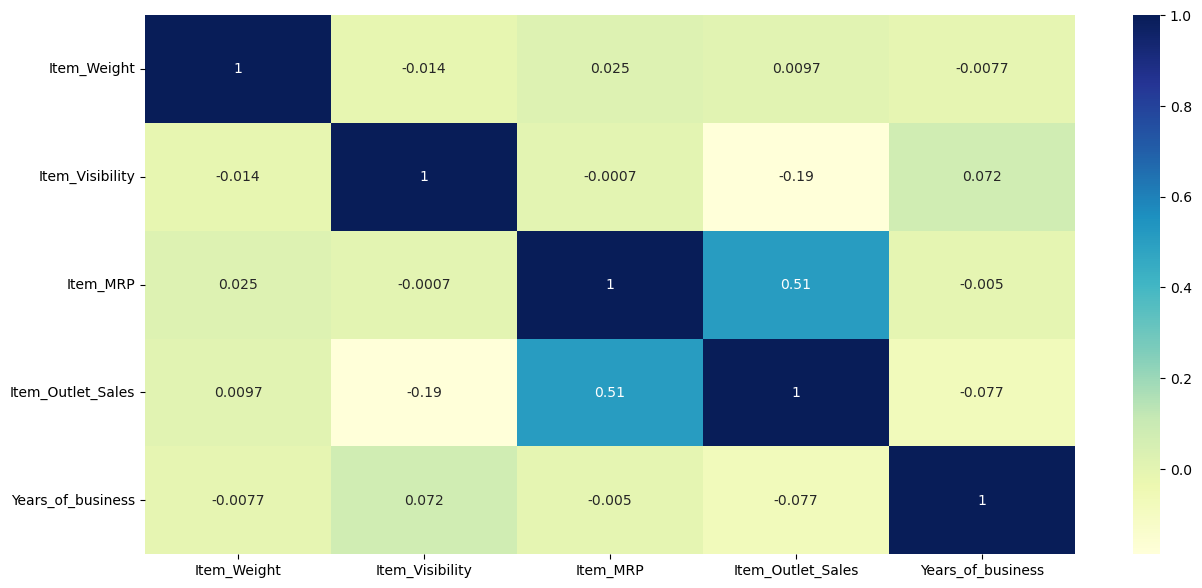

In [18]:
paper = plt.figure(figsize=[15,7])
sns.heatmap(train.corr(), annot = True,cmap='YlGnBu', linecolor ='black')
plt.show()

- From the heatmap we can see that there is some relation between **Item_Outlet_Sales** and **Item_MRP**.

#### Chi-Sqaure Test

- We will now perform Chi-Square test on columns to understand if there a relationship between the columns.

In [19]:
def chi_square(x1, x2):
    crosstab = pd.crosstab(x1, x2)
    _,p,_,_ = chi2_contingency(crosstab) # we only need p-value to verify the strength of the relationship
    if p < 0.05:
        print(f"The relationship between {x1.name} and {x2.name} is strong: p = {p}")
    else:
        print(f"The relationship between {x1.name} and {x2.name} is not strong: p = {p}")

In [20]:
obj_ls = []
for i in train.columns:
    if train[i].dtype == 'object':
        obj_ls.append(i)

In [21]:
for i in obj_ls:
    for j in obj_ls:
        if i != j:
            chi_square(train[i], train[j])

The relationship between Item_Fat_Content and Item_Type is strong: p = 0.0
The relationship between Item_Fat_Content and Outlet_Size is not strong: p = 0.947492000235563
The relationship between Item_Fat_Content and Outlet_Location_Type is not strong: p = 0.9404540785482409
The relationship between Item_Fat_Content and Outlet_Type is not strong: p = 0.9919389464641075
The relationship between Item_Type and Item_Fat_Content is strong: p = 0.0
The relationship between Item_Type and Outlet_Size is not strong: p = 0.9976330788025009
The relationship between Item_Type and Outlet_Location_Type is not strong: p = 0.9963035075844918
The relationship between Item_Type and Outlet_Type is not strong: p = 0.9989342767300661
The relationship between Outlet_Size and Item_Fat_Content is not strong: p = 0.947492000235563
The relationship between Outlet_Size and Item_Type is not strong: p = 0.9976330788025009
The relationship between Outlet_Size and Outlet_Location_Type is strong: p = 0.0
The relations

We see that there is strong relationship between the following categorical features: <br>
- **Item_Fat_Content** and **Item_Type**, <br>
- **Outlet_Size** and **Outlet_Location_Type**, <br>
- **Outlet_Size** and **Outlet_Type**, <br>
- **Outlet_Location_Type** and **Outlet_Type**.

<a name=Section7></a>
### **7. Data Preparation for Modeling**

<a name=Section71></a>
#### **7.1 Creating X and Y**

In [22]:
x = train.drop(['Item_Outlet_Sales'], axis=1)

In [23]:
y = train['Item_Outlet_Sales']

<a name=Section72></a>
#### **7.2 Encoding**

- Before we train our models, it is important to encode our data. Encoding is performed to convert the categorical variables to continuous variables.
- We will use **LabelEncoder** to encode the categorical variables.

In [24]:
le = LabelEncoder()
for i in x.columns:
    if x[i].dtype == 'object':
        x[i] = le.fit_transform(x[i])

In [25]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Years_of_business
0,9.300,0,0.015920,4,249.8092,1,0,1,23
1,5.920,1,0.019095,14,48.2692,1,2,2,13
2,17.500,0,0.016621,10,141.6180,1,0,1,23
3,19.200,1,0.000000,6,182.0950,1,2,0,24
4,8.930,0,0.000000,9,53.8614,0,2,1,35
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.055230,13,214.5218,0,2,1,35
8519,8.380,1,0.045912,0,108.1570,1,1,1,20
8520,10.600,0,0.034581,8,85.1224,2,1,1,18
8521,7.210,1,0.135597,13,103.1332,1,2,2,13


<a name=Section73></a>
#### **7.3 Splitting the data into training and testing sets**

- We will use the **train_test_split()** method to split X and Y into training and testing sets.

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=123)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(6818, 9)
(1705, 9)
(6818,)
(1705,)


<a name=Section8></a>
### **8. Applying ML Models and Model Evaluation**

- To predict the sales, we will model our data on three ML models. <br>
    1. Linear Regression
    2. Decision Tree
    3. Random Forest

- We will use **Root Mean Squared Error (RMSE)** and **R-squared (R2)** as our model evaluation metrics.

In [28]:
algs = [LinearRegression(), DecisionTreeRegressor(random_state=42), RandomForestRegressor(random_state=42)]

for alg in algs:

  # Extracting model name
  model_name = type(alg).__name__

  # Train the model
  alg.fit(X_train, Y_train)

  # Make predictions on the trained model
  train_predictions = alg.predict(X_train)
  test_predictions = alg.predict(X_test)

  # Estimating the model performance
  train_RMSE = np.sqrt(mean_squared_error(Y_train, train_predictions))
    
  test_RMSE = np.sqrt(mean_squared_error(Y_test, test_predictions))


  # Display the metrics and time took to develop the model
  print(f'Train Performance Metrics of {model_name}:')
  print(f'[RMSE]: {train_RMSE}')
  print('----------------------------------------\n')
    
  
  print(f'Test Performance Metrics of {model_name}:')
  print(f'[RMSE]: {test_RMSE}')
  print('----------------------------------------\n')

Train Performance Metrics of LinearRegression:
[RMSE]: 0.6562641550846127
----------------------------------------

Test Performance Metrics of LinearRegression:
[RMSE]: 0.6434807041178178
----------------------------------------

Train Performance Metrics of DecisionTreeRegressor:
[RMSE]: 9.315418059754916e-18
----------------------------------------

Test Performance Metrics of DecisionTreeRegressor:
[RMSE]: 0.7506607896073668
----------------------------------------

Train Performance Metrics of RandomForestRegressor:
[RMSE]: 0.20674674780025945
----------------------------------------

Test Performance Metrics of RandomForestRegressor:
[RMSE]: 0.5504506892152948
----------------------------------------



<a name=Section9></a>
### **9. Conclusion**

- The dataset had **8523** observations and **12** features.
- Some of the features like **Item_Outlet_Sales** and **Item_Visibility** were highly skewed. To deal with the skewness **Log Transformation** was applied.
- We see that out of the three models, Random Forest performs better as compared to Linear Regression and Decision Tree. 
- The Random Forest model is able to predict the sales with an **RMSE value** of **0.55**.